In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('./Content/advertising.csv', delimiter =',', skip_header =1)
N = data.shape[0]
print(N)
X = data[:, :3]
y = data[:,3:]

200


In [3]:
def mean_normalization(X):
  N = len(X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X_b = (X - avg) / (maxi - mini)
  X_b = np.hstack([np.ones((N, 1)), X_b])
  return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [4]:
def batch_gradient_descent(X_b, y, n_epochs =100, learning_rate =0.01):
  thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033] , [0.29763545]])
  N = data.shape[0]
  thetas_path = [thetas]
  losses = []
  for i in range(n_epochs):
    #predict:
    y_hat = X_b.dot(thetas)

    #loss:
    loss = (y_hat - y) * (y_hat - y)

    #gradient_loss:
    gradient_loss = 2*(y_hat - y)/N

    #compute gradient:
    compute_gradient = X_b.T.dot(gradient_loss)

    #update thetas:
    thetas = thetas - learning_rate * compute_gradient
    thetas_path.append(thetas)

    #Add loss_mean
    loss_mean = np.sum(loss)/N
    losses.append(loss_mean)
  return thetas_path, losses

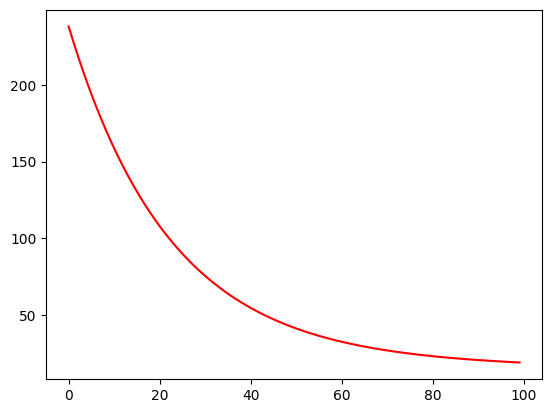

In [5]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs = 100, learning_rate=0.01)
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color ="r")
plt.show()

In [6]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate = 0.01)
print(round(sum(losses), 2))

6716.46
